<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/modelo_fijo_datos_ibex35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

# DATOS

In [2]:
symbols = [
"ANA.MC", "ACX.MC", "ACS.MC", "AENA.MC", "AMS.MC", "MTS.MC", "SAB.MC", "BKIA.MC", "BKT.MC", "BBVA.MC", "CABK.MC",
"CLNX.MC", "CIE.MC", "ENG.MC", "ELE.MC", "FER.MC", "GRF.MC", "IAG.MC", "IBE.MC", "ITX.MC", "IDR.MC", "COL.MC",
"MEL.MC", "MRL.MC", "NTGY.MC", "PHM.MC", "REE.MC", "REP.MC", "SGRE.MC", "SLR.MC", "TRE.MC", "TEF.MC", "VIS.MC",
"VWS.CO"
]

In [3]:
# Descargar datos
start_date = "2016-01-01"
end_date = "2023-01-01"

In [4]:
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  34 of 34 completed

ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['REE.MC', 'BKIA.MC', 'SGRE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [5]:
adj_close = data['Adj Close']

In [6]:
adj_close.shape

(1797, 34)

In [7]:
adj_close.isna().sum()

ACS.MC        5
ACX.MC        5
AENA.MC       5
AMS.MC        5
ANA.MC        5
BBVA.MC       5
BKIA.MC    1797
BKT.MC        5
CABK.MC       5
CIE.MC        5
CLNX.MC       5
COL.MC        5
ELE.MC        5
ENG.MC        5
FER.MC        5
GRF.MC        5
IAG.MC        5
IBE.MC        5
IDR.MC        5
ITX.MC        5
MEL.MC        5
MRL.MC        5
MTS.MC        5
NTGY.MC       5
PHM.MC        5
REE.MC     1797
REP.MC        5
SAB.MC        5
SGRE.MC    1797
SLR.MC        5
TEF.MC        5
TRE.MC        5
VIS.MC        5
VWS.CO       45
dtype: int64

In [8]:
adj_close = adj_close.drop(["BKIA.MC", "REE.MC", "SGRE.MC"  ], axis = 1)

In [9]:
adj_close.isna().sum()

ACS.MC      5
ACX.MC      5
AENA.MC     5
AMS.MC      5
ANA.MC      5
BBVA.MC     5
BKT.MC      5
CABK.MC     5
CIE.MC      5
CLNX.MC     5
COL.MC      5
ELE.MC      5
ENG.MC      5
FER.MC      5
GRF.MC      5
IAG.MC      5
IBE.MC      5
IDR.MC      5
ITX.MC      5
MEL.MC      5
MRL.MC      5
MTS.MC      5
NTGY.MC     5
PHM.MC      5
REP.MC      5
SAB.MC      5
SLR.MC      5
TEF.MC      5
TRE.MC      5
VIS.MC      5
VWS.CO     45
dtype: int64

In [10]:
adj_close = adj_close.fillna(method="ffill")

In [11]:
adj_close.isna().sum().sum()

0

In [12]:
adj_close.shape

(1797, 31)

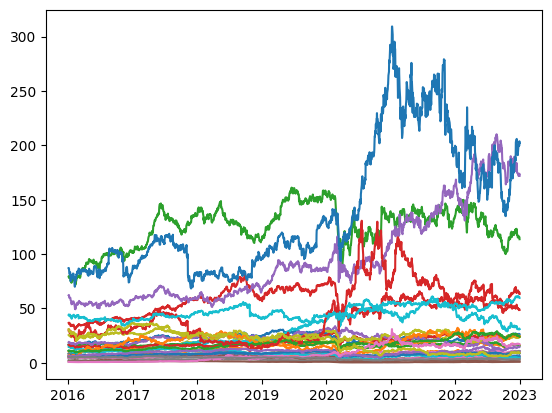

In [13]:
plt.plot(adj_close);

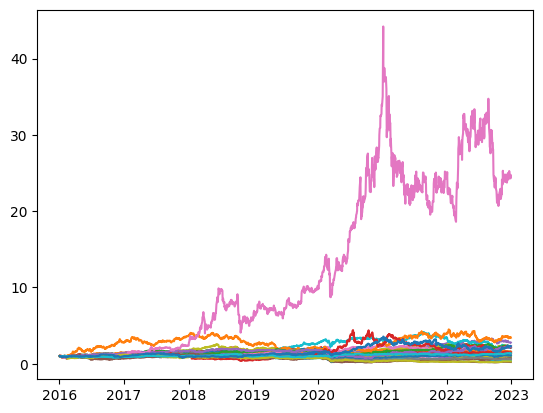

In [14]:
plt.plot(adj_close/adj_close.iloc[0]);

In [15]:
adj_close.iloc[500:560].shape

(60, 31)

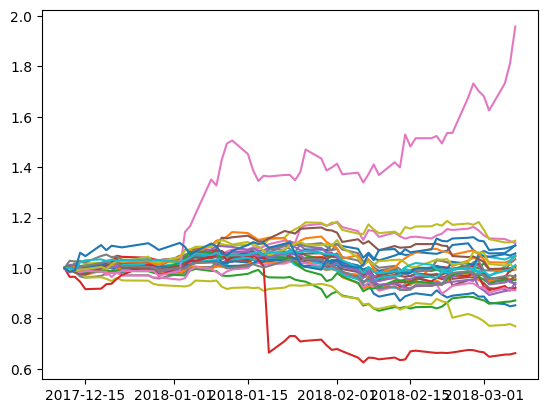

In [16]:
plt.plot(adj_close.iloc[500:560]/adj_close.iloc[500:560].iloc[0]);

In [17]:
adj_close.columns

Index(['ACS.MC', 'ACX.MC', 'AENA.MC', 'AMS.MC', 'ANA.MC', 'BBVA.MC', 'BKT.MC',
       'CABK.MC', 'CIE.MC', 'CLNX.MC', 'COL.MC', 'ELE.MC', 'ENG.MC', 'FER.MC',
       'GRF.MC', 'IAG.MC', 'IBE.MC', 'IDR.MC', 'ITX.MC', 'MEL.MC', 'MRL.MC',
       'MTS.MC', 'NTGY.MC', 'PHM.MC', 'REP.MC', 'SAB.MC', 'SLR.MC', 'TEF.MC',
       'TRE.MC', 'VIS.MC', 'VWS.CO'],
      dtype='object')

In [18]:
adj_close.iloc[0:2, [0,1,2,3,4,5,6,7,8,9]]

,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,CLNX.MC
Date,,,,,,,,,,
2016-01-04 00:00:00,16.762018,5.926919,79.277679,36.609077,62.069111,4.407446,4.751968,2.298498,10.778535,14.772965
2016-01-05 00:00:00,16.794477,6.070360,79.734398,36.779480,62.354927,4.436830,4.754171,2.279122,10.822529,14.747092


# def pesos_marko(datos_top, num_portfolios = 1000):

In [19]:
def pesos_marko(datos_top, num_portfolios = 1000):

  returns = datos_top.pct_change().dropna()
  cov_matrix = returns.cov()
  tickers = datos_top.columns
  # Número de simulaciones de cartera

  # Inicializar arrays para almacenar los resultados de las simulaciones
  portfolio_returns = np.zeros(num_portfolios)
  portfolio_volatilities = np.zeros(num_portfolios)
  portfolio_weights = np.zeros((num_portfolios, len(tickers)))

  # Realizar las simulaciones de cartera
  for i in range(num_portfolios):
      # Generar ponderaciones aleatorias y normalizarlas para que sumen 1
      weights = np.random.random(len(tickers))
      weights /= np.sum(weights)

      # Calcular el rendimiento y la volatilidad de la cartera
      portfolio_return = np.dot(weights, returns.mean()) * 252
      portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

      # Almacenar los resultados
      portfolio_returns[i] = portfolio_return
      portfolio_volatilities[i] = portfolio_volatility
      portfolio_weights[i, :] = weights

  # Supongamos una tasa libre de riesgo del ...
  risk_free_rate = 0.01

  # Calcular el índice de Sharpe para cada cartera simulada
  sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatilities

  carteras_ordenadas = np.argsort(-sharpe_ratios)

  return portfolio_weights[carteras_ordenadas[0]]

# def calculate_sharpe_ratio(returns, risk_free_rate):

In [20]:
import numpy as np

def calculate_sharpe_ratio(returns, risk_free_rate):
    """
    Calcular el ratio de Sharpe

    Parámetros:
    returns (np.array): Array de rendimientos de la inversión
    risk_free_rate (float): Tasa de rendimiento sin riesgo

    Devuelve:
    sharpe_ratio (float): Ratio de Sharpe
    """

    # Calcular el rendimiento promedio
    avg_returns = np.mean(returns)

    # Calcular la desviación estándar de los rendimientos
    std_returns = np.std(returns)

    # Calcular el ratio de Sharpe
    sharpe_ratio = (avg_returns - risk_free_rate) / std_returns

    return sharpe_ratio


# def top_n_indices(arr, n):

In [21]:
import numpy as np

def top_n_indices(arr, n):
    """
    Devuelve los índices de los n mayores elementos en el array.

    Parámetros:
    arr (np.array): Array de entrada
    n (int): Número de índices a devolver

    Devuelve:
    top_indices (np.array): Índices de los n mayores elementos
    """
    # Ordenar los índices en función de los valores en 'arr'
    # 'argsort' devuelve los índices que ordenarían 'arr'
    # '-arr' se usa para ordenar en orden descendente
    sorted_indices = np.argsort(-arr)

    # Devolver los primeros 'n' índices
    top_indices = sorted_indices[:n]

    return top_indices


# def algo_sharpe(data, n_activos_top = 10):

In [22]:
def algo_sharpe(data, n_activos_top = 10):

  sharpe = calculate_sharpe_ratio(np.log(data / data.shift(1)).dropna(), 0.01)
  top = top_n_indices(sharpe, n_activos_top)

  return top

# def algo_random(n_activos_seleccionados, n_shape):

In [23]:
def algo_random(n_activos_seleccionados, n_shape):
  return np.random.choice(n_shape, size=n_activos_seleccionados, replace=False)

# def calcular_rendimiento(data, data_forward, activos_seleccionados):

In [24]:
def calcular_rendimiento(data, data_forward, activos_seleccionados):
  #data = datos_analisis[i-days_backward:i]
  #data_forward = datos_analisis[i:i+days_forward]

  # ALGO RANDOM
  #activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  #print("activos_seleccionados")
  #print(activos_seleccionados)
  ## CALCULAMOS FRONTERA MARKO
  data_seleccion = data.iloc[:,activos_seleccionados]
  pesos =  pesos_marko(data_seleccion , num_portfolios=num_portfolios)
  #print("pesos")
  #print(pesos)
  ## SELECCIONAMOS RENDIMIENTOS FUTUROS DE ACTIVOS
  data_forward_seleccion= data_forward.iloc[:,activos_seleccionados]
  rendimiento_activos = data_forward_seleccion.iloc[[0,-1],:].pct_change().dropna()
  #print("rendimiento_activos")
  #print(rendimiento_activos)
  ## CALCULAMOS RENDIMIENTOS FUTUROS DE CARTERA
  return ( rendimiento_activos * pesos).sum(axis = 1)


In [25]:
adj_close.shape

(1797, 31)

In [26]:
adj_close[1797-500:1797].shape

(500, 31)

# softmax_by_asset

In [27]:
import tensorflow as tf
from keras import backend as K

def softmax_by_asset(x):
    e = K.exp(x - K.max(x, axis=-1, keepdims=True))
    s = K.sum(e, axis=-1, keepdims=True)
    return e / s

# INVERSION

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
"""
datos_analisis = adj_close[1797-700:1797]

days_backward = 90
days_forward = 30

n_activos_seleccionados = 10
num_portfolios = 10000

rendimientos = {}
rendimientos["rendimiento_algo_random_1"] = []
rendimientos["rendimiento_algo_random_2"] = []
rendimientos["rendimiento_algo_sharpe_1"] = []
rendimientos["rendimiento_algo_sharpe_2"] = []

i = 0
n_i = 100


for i in range(days_backward, len(datos_analisis), days_forward):
  #print(i-90, i , i + days_forward )

  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_1"].append(rendimiento)

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_2"].append(rendimiento)

  ####

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_1"].append(rendimiento)

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_2"].append(rendimiento)


days = []
for i in range(days_backward, len(datos_analisis), days_forward):
  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]
  days.append(data_forward.index[-1].date())
  break
days = np.array(days)


plt.plot(np.array(rendimientos["rendimiento_algo_random_1"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_random_2"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_1"]),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_2"]),   color = 'b');
plt.xticks(np.arange(len(days)), days, rotation=45);
"""

'\ndatos_analisis = adj_close[1797-700:1797]\n\ndays_backward = 90\ndays_forward = 30\n\nn_activos_seleccionados = 10\nnum_portfolios = 10000\n\nrendimientos = {}\nrendimientos["rendimiento_algo_random_1"] = []\nrendimientos["rendimiento_algo_random_2"] = []\nrendimientos["rendimiento_algo_sharpe_1"] = []\nrendimientos["rendimiento_algo_sharpe_2"] = []\n\ni = 0\nn_i = 100\n\n\nfor i in range(days_backward, len(datos_analisis), days_forward):\n  #print(i-90, i , i + days_forward )\n\n  data = datos_analisis[i-days_backward:i]\n  data_forward = datos_analisis[i:i+days_forward]\n\n  # ALGO RANDOM\n  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])\n  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)\n  ## GUARDAMOS RENDIMIENTO\n  rendimientos["rendimiento_algo_random_1"].append(rendimiento)\n\n  # ALGO RANDOM\n  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])\n  rendimiento = calcular_rendimiento(data, data_f

# TO-DO visualizamos los retnornos de cada compra, pero NO el acumulado

# X_DATA y Y_DATA

In [126]:
adj_close.shape

(1797, 31)

In [127]:
datos_analisis = adj_close[0:1500]
datos_analisis.shape

(1500, 31)

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [129]:
datos_analisis.shape

(1500, 31)

In [130]:
t = datos_analisis / datos_analisis.iloc[0,:]

In [131]:
t.shape

(1500, 31)

In [132]:

days_backward = 150
days_forward = 30
days_steps = 1

X_DATA = []
X_DATA_NORM_ONE = []
X_DATA_TAB = []
Y_DATA = []

for i in range(days_backward, len(datos_analisis), days_steps):
  # retornos logaritmicos
  X_data = datos_analisis[i-days_backward:i]
  X_data = np.log(X_data).diff().dropna()
  X_DATA.append(X_data)
  #retornos normalizados
  X_data = datos_analisis[i-days_backward:i]
  X_data = X_data / X_data.iloc[0,:]
  X_DATA_NORM_ONE.append(X_data)
  # datos tabulares
  X_data = datos_analisis[i-days_backward:i]
  X_data =   pd.DataFrame(
      np.vstack(
          (X_data.max(),
           X_data.min(),
           X_data.mean(),
           X_data.std(),
           calculate_sharpe_ratio(X_data, 0),
           np.argsort(np.argsort(calculate_sharpe_ratio(X_data, 0))) )),

      ).T
  X_data = np.array(X_data)
  X_DATA_TAB.append(X_data)

  # y
  data_forward = datos_analisis[i:i+days_forward]

  rs = calculate_sharpe_ratio(np.log(data_forward).diff().dropna(), 0)
  Y_data = np.argsort(np.argsort(rs))
  #Y_data = Y_data / Y_data.max()
  Y_DATA.append(Y_data)

X_DATA = np.array(X_DATA)
X_DATA_NORM_ONE = np.array(X_DATA_NORM_ONE)
X_DATA_TAB = np.array(X_DATA_TAB)
Y_DATA = np.array(Y_DATA)


In [133]:
X_DATA_TAB.shape

(1350, 31, 6)

In [134]:
X_DATA_NORM_ONE.shape

(1350, 150, 31)

In [135]:
calculate_sharpe_ratio(datos_analisis, 0)

ACS.MC      5.689259
ACX.MC      5.417964
AENA.MC     6.267482
AMS.MC      4.615297
ANA.MC      3.115303
BBVA.MC     4.630903
BKT.MC      3.838172
CABK.MC     4.105304
CIE.MC      4.211651
CLNX.MC     1.922528
COL.MC      5.059435
ELE.MC      5.124951
ENG.MC     13.999413
FER.MC      4.904036
GRF.MC      6.429830
IAG.MC      2.455884
IBE.MC      3.221727
IDR.MC      4.993165
ITX.MC      9.589323
MEL.MC      3.201335
MRL.MC      6.180166
MTS.MC      3.004640
NTGY.MC     4.841766
PHM.MC      1.541451
REP.MC      4.666563
SAB.MC      2.401523
SLR.MC      1.046913
TEF.MC      4.236355
TRE.MC      2.766984
VIS.MC      7.614566
VWS.CO      2.153073
dtype: float64

In [136]:
np.argsort(np.argsort(calculate_sharpe_ratio(datos_analisis, 0)))

ACS.MC     24
ACX.MC     23
AENA.MC    26
AMS.MC     15
ANA.MC      8
BBVA.MC    16
BKT.MC     11
CABK.MC    12
CIE.MC     13
CLNX.MC     2
COL.MC     21
ELE.MC     22
ENG.MC     30
FER.MC     19
GRF.MC     27
IAG.MC      5
IBE.MC     10
IDR.MC     20
ITX.MC     29
MEL.MC      9
MRL.MC     25
MTS.MC      7
NTGY.MC    18
PHM.MC      1
REP.MC     17
SAB.MC      4
SLR.MC      0
TEF.MC     14
TRE.MC      6
VIS.MC     28
VWS.CO      3
dtype: int64

## ejemplo datos tabulares

In [137]:
pd.DataFrame(
    np.vstack( (datos_analisis.max(), datos_analisis.min(), datos_analisis.mean(), datos_analisis.std(), calculate_sharpe_ratio(datos_analisis, 0), np.argsort(np.argsort(calculate_sharpe_ratio(datos_analisis, 0))) )),
    columns = datos_analisis.columns,
    index=["max", "min", "mean", "std", "sharpe", "ranking"]
    ).T

,max,min,mean,std,sharpe,ranking
ACS.MC,30.467094,8.982969,22.330937,3.926414,5.689259,24.0
ACX.MC,11.242288,4.524662,7.645613,1.411630,5.417964,23.0
AENA.MC,161.127640,71.604897,124.556387,19.880062,6.267482,26.0
AMS.MC,80.016983,30.632217,54.943837,11.908694,4.615297,15.0
ANA.MC,163.049606,49.215446,79.878777,25.649324,3.115303,8.0
BBVA.MC,5.832594,1.868374,4.151727,0.896825,4.630903,16.0
BKT.MC,7.315497,1.990775,4.984734,1.299159,3.838172,11.0
CABK.MC,3.493728,1.344590,2.391103,0.582636,4.105304,12.0
CIE.MC,27.618172,8.908788,17.924800,4.257422,4.211651,13.0
CLNX.MC,60.987103,10.904668,28.289612,14.719704,1.922528,2.0


In [138]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [139]:
datos_analisis = adj_close[1500:]

In [140]:
datos_analisis.shape

(297, 31)

In [141]:
days_backward = 150
days_forward = 30
days_steps = 1

X_DATA_TEST = []
X_DATA_NORM_ONE_TEST = []
X_DATA_TAB_TEST = []
Y_DATA_TEST = []

for i in range(days_backward, len(datos_analisis), days_steps):

  X_data = datos_analisis[i-days_backward:i]
  X_data = np.log(X_data).diff().dropna()
  X_DATA_TEST.append(X_data)
  #retornos normalizados
  X_data = datos_analisis[i-days_backward:i]
  X_data = X_data / X_data.iloc[0,:]
  X_DATA_NORM_ONE_TEST.append(X_data)
  # datos tabulares
  X_data = datos_analisis[i-days_backward:i]
  X_data =   pd.DataFrame(
      np.vstack(
          (X_data.max(),
           X_data.min(),
           X_data.mean(),
           X_data.std(),
           calculate_sharpe_ratio(X_data, 0),
           np.argsort(np.argsort(calculate_sharpe_ratio(X_data, 0))) )),

      ).T
  X_data = np.array(X_data)
  X_DATA_TAB_TEST.append(X_data)

  # Y

  data_forward = datos_analisis[i:i+days_forward]

  rs = calculate_sharpe_ratio(np.log(data_forward).diff().dropna(), 0)
  Y_data = np.argsort(np.argsort(rs))
  #Y_data = Y_data / Y_data.max()
  Y_DATA_TEST.append(Y_data)

X_DATA_TEST = np.array(X_DATA_TEST)
X_DATA_NORM_ONE_TEST = np.array(X_DATA_NORM_ONE_TEST)
X_DATA_TAB_TEST = np.array(X_DATA_TAB_TEST)
Y_DATA_TEST = np.array(Y_DATA_TEST)

In [142]:
X_DATA_TAB.shape

(1350, 31, 6)

In [143]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [144]:
X_DATA_TEST.shape, Y_DATA_TEST.shape

((147, 149, 31), (147, 31))

In [145]:
Y_DATA[0:2]

array([[17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,
         7, 21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27],
       [17,  2, 13, 25, 15, 23, 21, 26, 11,  9,  5,  8,  1, 16,  7, 18,
         6, 28, 14, 19,  3,  0, 10, 24, 20, 12, 29, 22, 30,  4, 27]])

In [146]:
(Y_DATA[0:2] < 10).astype(int)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [147]:
Y_DATA_CATEGORICAL_SIMPLE = to_categorical((Y_DATA < 10).astype(int))

In [148]:
Y_DATA_CATEGORICAL_SIMPLE.shape

(1350, 31, 2)

In [149]:
Y_DATA_CATEGORICAL_SIMPLE[0]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [150]:
Y_DATA_CATEGORICAL = to_categorical(Y_DATA)

In [151]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [152]:
pd.DataFrame(X_DATA[0])

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.001935,0.023913,0.005744,0.004644,0.004594,0.006645,0.000463,-0.008465,0.004073,-0.001753,...,0.058618,0.012138,0.038173,-0.008886,-0.003065,0.062304,0.005125,-0.014029,0.009870,0.000000
1,-0.007761,-0.045178,-0.005265,0.002501,-0.002678,-0.021604,-0.022353,-0.036228,-0.024693,-0.011765,...,-0.066971,-0.007535,-0.028492,-0.028999,-0.009871,-0.034133,-0.007244,-0.033673,-0.009870,-0.011641
2,-0.028048,-0.048484,-0.017914,-0.025171,-0.037460,-0.012848,-0.014650,-0.025795,-0.034980,0.001774,...,-0.054774,-0.008954,-0.001929,-0.040452,-0.023840,-0.028171,-0.007703,-0.003660,-0.005425,-0.022391
3,-0.015749,0.007801,0.009239,-0.014580,-0.000663,-0.022848,-0.012428,-0.012473,-0.016679,-0.025121,...,-0.036675,-0.011337,-0.047440,-0.040925,-0.033573,0.000000,-0.024306,-0.027098,-0.018668,-0.022681
4,-0.003465,-0.021453,-0.004852,0.009057,-0.005319,-0.001755,-0.000488,-0.002377,0.002921,-0.006990,...,-0.008635,0.013442,-0.049803,-0.021852,0.009801,-0.007168,-0.013011,-0.011842,0.015944,-0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.011195,-0.015825,0.001177,0.004106,0.005963,0.017963,0.005445,0.016731,0.014975,0.007550,...,0.010471,0.004897,0.051736,0.009054,0.019868,-0.007273,0.024766,0.027189,0.009481,0.009569
145,-0.012722,0.034404,-0.005505,-0.009357,-0.022437,-0.036254,-0.021472,-0.036534,0.028138,-0.003139,...,-0.000366,0.007300,-0.027691,-0.035827,-0.022380,-0.022141,-0.046265,-0.017982,0.001347,0.011193
146,-0.019879,0.023271,0.017201,0.051425,-0.020375,0.036446,0.018112,0.044128,0.004038,-0.004727,...,0.050617,-0.002968,-0.006501,0.003109,0.024836,-0.015038,0.002855,0.013653,-0.083173,-0.006011
147,-0.008417,-0.016871,-0.001163,0.018052,-0.030427,-0.038035,-0.006431,-0.012990,0.006885,0.001893,...,0.001389,-0.005962,-0.013129,-0.014743,-0.029877,-0.015268,0.002051,0.011505,-0.008289,-0.004316


In [153]:
import tensorflow as tf

In [154]:
def loss_ranking(y_true, y_pred, weights = 1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    diff = tf.abs(y_true - y_pred)
    loss = tf.reduce_mean(weights * diff)
    return loss


In [155]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

# Y discreta

In [156]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [157]:
X_DATA[0]

array([[ 0.0019346 ,  0.02391335,  0.00574447, ..., -0.0140293 ,
         0.00986983,  0.        ],
       [-0.0077612 , -0.04517777, -0.00526455, ..., -0.03367312,
        -0.00986983, -0.0116415 ],
       [-0.02804829, -0.04848415, -0.0179138 , ..., -0.00365963,
        -0.00542528, -0.02239052],
       ...,
       [-0.01987905,  0.02327142,  0.01720132, ...,  0.01365271,
        -0.08317278, -0.00601115],
       [-0.00841745, -0.01687085, -0.00116349, ...,  0.01150472,
        -0.00828937, -0.00431591],
       [-0.03358295, -0.02628899, -0.00896524, ..., -0.02424138,
         0.0060925 , -0.01789285]])

In [158]:
Y_DATA[0]

array([17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,  7,
       21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27])

In [159]:
Y_DATA_NORM = Y_DATA  / Y_DATA.max()

In [160]:
Y_DATA[56]

array([25, 26, 14, 17,  3, 13, 27, 28, 23,  2, 16, 24,  4,  9, 19, 29,  5,
        7, 20,  6, 11, 30,  0,  8, 18, 22, 12,  1, 21, 15, 10])

In [161]:
Y_DATA_NORM[56]

array([0.83333333, 0.86666667, 0.46666667, 0.56666667, 0.1       ,
       0.43333333, 0.9       , 0.93333333, 0.76666667, 0.06666667,
       0.53333333, 0.8       , 0.13333333, 0.3       , 0.63333333,
       0.96666667, 0.16666667, 0.23333333, 0.66666667, 0.2       ,
       0.36666667, 1.        , 0.        , 0.26666667, 0.6       ,
       0.73333333, 0.4       , 0.03333333, 0.7       , 0.5       ,
       0.33333333])

In [162]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
m = GRU(units=200)(m)

#m = Dense(units=50)(m)

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='linear')(m)

m = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
m.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=loss_ranking,
        metrics=[])

m.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 149, 31)]         0         
                                                                 
 gru_2 (GRU)                 (None, 200)               139800    
                                                                 
 flatten_4 (Flatten)         (None, 200)               0         
                                                                 
 dense_8 (Dense)             (None, 31)                6231      
                                                                 
Total params: 146,031
Trainable params: 146,031
Non-trainable params: 0
_________________________________________________________________


In [163]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [164]:
X_DATA[0:1000].shape, X_DATA[1000:].shape

((1000, 149, 31), (350, 149, 31))

In [165]:
from keras.callbacks import EarlyStopping
"""
También puedes optar por restaurar los mejores pesos encontrados durante el entrenamiento al finalizar el entrenamiento definiendo el argumento restore_best_weights como True:
"""
# early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)


'\nTambién puedes optar por restaurar los mejores pesos encontrados durante el entrenamiento al finalizar el entrenamiento definiendo el argumento restore_best_weights como True:\n'

In [166]:
#h = m.fit(X_DATA,Y_DATA, epochs=1000, batch_size=X_DATA.shape[0], validation_split = 0.5) #batch_size=X_DATA.shape[0]
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = m.fit(X_DATA[0:1000],Y_DATA[0:1000],
          epochs=10000,
          batch_size=X_DATA.shape[0],
          validation_data = (X_DATA[1000:], Y_DATA[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/10000
1/1 [==============================] - 2s 2s/step - loss: 55254512.0000 - val_loss: 392527.7812
Epoch 2/10000
1/1 [==============================] - 0s 141ms/step - loss: 20474544.0000 - val_loss: 2811115.5000
Epoch 3/10000
1/1 [==============================] - 0s 133ms/step - loss: 12637396.0000 - val_loss: 57336.1250
Epoch 4/10000
1/1 [==============================] - 0s 113ms/step - loss: 2176592.5000 - val_loss: 422777.8438
Epoch 5/10000
1/1 [==============================] - 0s 104ms/step - loss: 6940311.0000 - val_loss: 3105291.7500
Epoch 6/10000
1/1 [==============================] - 0s 121ms/step - loss: 44134756.0000 - val_loss: 865726.7500
Epoch 7/10000
1/1 [==============================] - 0s 116ms/step - loss: 7879663.0000 - val_loss: 257291.8125
Epoch 8/10000
1/1 [==============================] - 0s 113ms/step - loss: 9651380.0000 - val_loss: 337836.2812
Epoch 9/10000
1/1 [==============================] - 0s 113ms/step - loss: 297861.8750 - val_loss: 211

In [167]:
154241.0156

154241.0156

In [168]:
1344245.1250 > 1

True

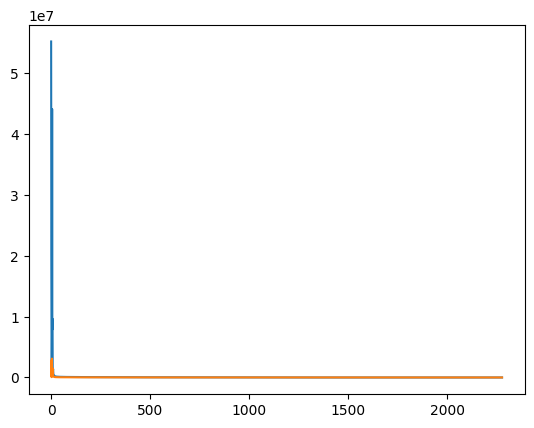

In [169]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

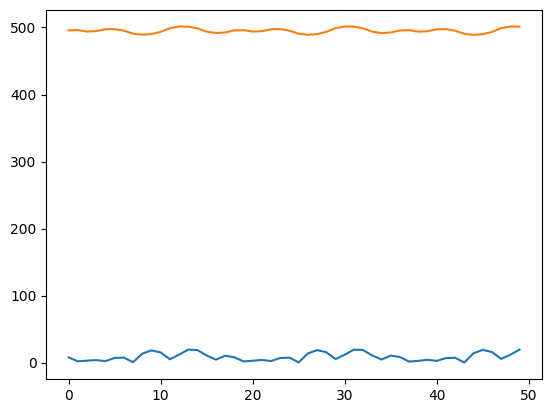

In [170]:
plt.plot(h.history["loss"][-50:])
plt.plot(h.history["val_loss"][-50:])

In [171]:
p_test = m(X_DATA_TEST)

In [172]:
loss_ranking(Y_DATA_TEST, p_test)

<tf.Tensor: shape=(), dtype=float32, numpy=283.82703>

In [173]:
p_train = m(X_DATA)

In [174]:
loss_ranking(Y_DATA, p_train)

<tf.Tensor: shape=(), dtype=float32, numpy=1501.2162>

In [175]:
p_test[0]

<tf.Tensor: shape=(31,), dtype=float32, numpy=
array([ 4.019163 ,  4.7983146,  5.333746 ,  9.896263 ,  3.9155877,
       -3.6304018,  3.6622183, -8.185156 ,  3.844253 ,  4.7970657,
       10.537817 ,  7.473284 , -1.5376555, -1.0487343,  1.623736 ,
        2.9357886, -4.810513 ,  5.242107 , -2.6787646,  4.392349 ,
        1.8026338, -5.665706 ,  4.6888647, -4.632351 ,  3.2362814,
        9.015037 ,  2.0253115, -2.010882 , -4.77486  , -4.071488 ,
        1.6514865], dtype=float32)>

In [176]:
# START 100 neuronas
# 1 - > (2.7393103, 15.981861)
# 2 -> (10.123219, 26.004683)
# 3 - > (15.026882, 26.003494)

# 200 neuronas
#
np.min(p_test), np.max(p_test)

(-8.283297, 10.614525)

In [177]:
np.min(Y_DATA_TEST[0]), np.max(Y_DATA_TEST[0])

(0, 30)

In [178]:
ranking_pred = np.argsort(np.argsort(p_test[0]))
ranking_pred

array([20, 24, 26, 29, 19,  6, 17,  0, 18, 23, 30, 27,  9, 10, 11, 15,  2,
       25,  7, 21, 13,  1, 22,  4, 16, 28, 14,  8,  3,  5, 12])

In [179]:
ranking_real = Y_DATA_TEST[0]
ranking_real

array([ 5,  0, 13, 21, 23,  8, 11, 12, 26, 22,  7, 10,  9, 28, 14, 20, 17,
       18, 29,  4, 19,  3, 25, 24,  1,  6, 15, 27,  2, 30, 16])

In [180]:
idx_activos_cartera_real = np.where(ranking_real < 10)
idx_activos_cartera_real

(array([ 0,  1,  5, 10, 12, 19, 21, 24, 25, 28]),)

In [181]:
idx_activos_cartera_pred = np.where(ranking_pred < 10)
idx_activos_cartera_pred

(array([ 5,  7, 12, 16, 18, 21, 23, 27, 28, 29]),)

In [182]:
X_DATA.shape

(1350, 149, 31)

# Y discreta 2 (GRU)

## prueba norm

In [183]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [184]:
Y_DATA[0]

array([17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,  7,
       21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27])

In [185]:
ej_norm = 2*(Y_DATA[0] - min(Y_DATA[0])) / (max(Y_DATA[0]) - min(Y_DATA[0])) - 1
ej_norm

array([ 0.13333333, -0.86666667, -0.2       ,  0.6       ,  0.        ,
        0.73333333,  0.53333333,  0.93333333, -0.26666667, -0.33333333,
       -1.        , -0.46666667, -0.8       , -0.13333333, -0.6       ,
        0.06666667, -0.53333333,  0.4       , -0.06666667,  0.26666667,
       -0.66666667, -0.93333333, -0.4       ,  0.33333333,  0.66666667,
        0.2       ,  0.86666667,  0.46666667,  1.        , -0.73333333,
        0.8       ])

In [186]:
np.argsort(ej_norm)

array([10, 21,  1, 12, 29, 20, 14, 16, 11, 22,  9,  8,  2, 13, 18,  4, 15,
        0, 25, 19, 23, 17, 27,  6,  3, 24,  5, 30, 26,  7, 28])

In [187]:
np.argsort(np.argsort(ej_norm))

array([17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,  7,
       21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27])

## calculo norm

In [188]:
Y_DATA.shape

(1350, 31)

In [189]:
r_min = np.min(Y_DATA, axis=1)[:, np.newaxis]
r_max = np.max(Y_DATA, axis=1)[:, np.newaxis]
r_min, r_max

(array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]),
 array([[30],
        [30],
        [30],
        ...,
        [30],
        [30],
        [30]]))

In [190]:
Y_DATA_NORM = 2 * (Y_DATA - 0) / (30 - 0) - 1

In [191]:
Y_DATA_NORM[0] == ej_norm

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [192]:
Y_DATA_TEST_NORM = 2 * (Y_DATA_TEST - 0) / (30 - 0) - 1

In [253]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
m = GRU(units=1)(m)

m = Dropout(0.1)(m)

m = Dense(units=1, activation = 'relu')(m) # loss: 0.3385 - val_loss: 0.3778

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='tanh')(m)

model_GRU = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
model_GRU.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',
        metrics=[])

model_GRU.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 149, 31)]         0         
                                                                 
 gru_7 (GRU)                 (None, 1)                 102       
                                                                 
 dropout_4 (Dropout)         (None, 1)                 0         
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
 flatten_13 (Flatten)        (None, 1)                 0         
                                                                 
 dense_18 (Dense)            (None, 31)                62        
                                                                 
Total params: 166
Trainable params: 166
Non-trainable param

In [194]:
from keras.callbacks import EarlyStopping

In [254]:
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = model_GRU.fit(X_DATA[0:1000],Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = (X_DATA[1000:], Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.3557 - val_loss: 0.3562
Epoch 2/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3535 - val_loss: 0.3570
Epoch 3/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3516 - val_loss: 0.3579
Epoch 4/200
1/1 [==============================] - 0s 54ms/step - loss: 0.3500 - val_loss: 0.3589
Epoch 5/200
1/1 [==============================] - 0s 55ms/step - loss: 0.3485 - val_loss: 0.3601
Epoch 6/200
1/1 [==============================] - 0s 52ms/step - loss: 0.3471 - val_loss: 0.3613
Epoch 7/200
1/1 [==============================] - 0s 54ms/step - loss: 0.3459 - val_loss: 0.3626
Epoch 8/200
1/1 [==============================] - 0s 51ms/step - loss: 0.3449 - val_loss: 0.3639
Epoch 9/200
1/1 [==============================] - 0s 56ms/step - loss: 0.3439 - val_loss: 0.3653
Epoch 10/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3431 - val_loss: 0.3666
Epoch 11/200
1/1 [===

In [196]:
(0.3787 - 0.3385 ) / 0.3385  * 100

11.875923190546516

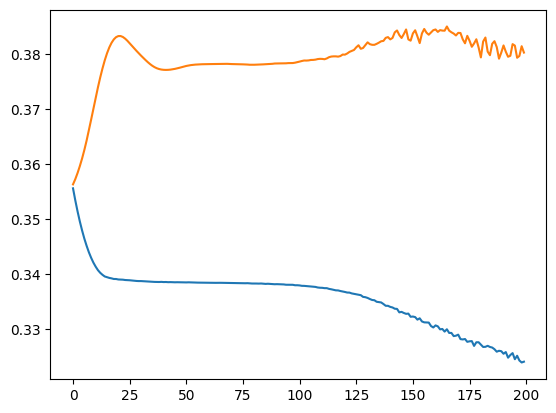

In [197]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

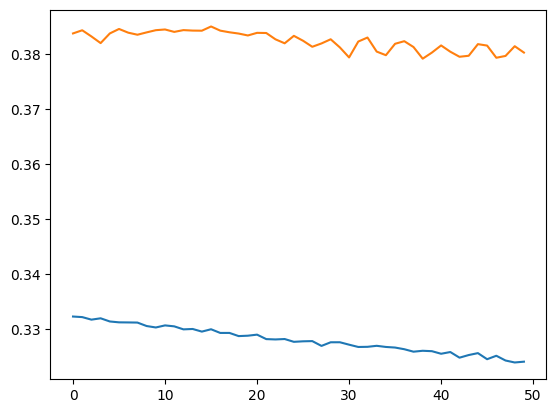

In [198]:
plt.plot(h.history["loss"][-50:])
plt.plot(h.history["val_loss"][-50:])

In [199]:
import tensorflow as tf


In [200]:
p_test = m(X_DATA_TEST)
np.mean(tf.keras.metrics.mean_squared_error(
   Y_DATA_TEST_NORM, p_test ))


0.38279605

In [201]:
mse_preds = np.array(tf.keras.metrics.mean_squared_error(
   Y_DATA_TEST_NORM, p_test ))

In [202]:
 np.where(mse_preds == mse_preds.min())

(array([10]),)

In [203]:
np.where(np.argsort(np.argsort(p_test[107] )) < 10)

(array([ 1,  5,  6, 17, 18, 19, 21, 25, 27, 28]),)

In [204]:
np.where(np.argsort(np.argsort(Y_DATA_TEST_NORM[107] )) < 10)

(array([ 1,  3,  4,  5,  6,  8,  9, 21, 24, 27]),)

In [205]:
Y_DATA_TEST_NORM.shape

(147, 31)

In [206]:
Y_DATA_NORM.shape

(1350, 31)

In [207]:
p_train = m(X_DATA)
np.mean(tf.keras.metrics.mean_squared_error(
   Y_DATA_NORM, p_train ))



0.33759815

In [208]:
Y_DATA_TEST_NORM[1]

array([-0.4       , -0.93333333, -0.33333333,  0.6       ,  0.4       ,
       -0.2       , -0.46666667, -0.26666667,  0.73333333,  0.46666667,
       -0.13333333, -0.53333333, -0.66666667,  0.86666667, -0.06666667,
        0.26666667,  0.13333333,  0.        ,  0.8       , -0.8       ,
        0.2       , -0.6       ,  0.53333333,  0.66666667, -1.        ,
       -0.73333333,  0.06666667,  0.93333333, -0.86666667,  1.        ,
        0.33333333])

In [209]:
p_test[1]

<tf.Tensor: shape=(31,), dtype=float32, numpy=
array([ 0.01338271, -0.08959369,  0.05446373,  0.11706155,  0.10200078,
       -0.11161061, -0.10943787, -0.03281973,  0.03487216,  0.22124416,
        0.13312438,  0.17178127, -0.00845686,  0.15477628,  0.01991776,
       -0.02371101,  0.20066315, -0.1099475 , -0.14181411, -0.264516  ,
        0.02532325, -0.09633928,  0.06451771, -0.02710981, -0.0414016 ,
       -0.17824514,  0.23745097, -0.19009171, -0.22009513,  0.03563058,
        0.0936796 ], dtype=float32)>

In [210]:
ranking_pred = np.argsort(np.argsort(p_test[0]))
ranking_pred



array([ 5, 10, 19, 27, 26,  6, 13, 18, 15, 30, 29, 16,  1, 21, 24, 22, 23,
       11,  4,  2, 20, 12, 17,  7,  8,  9, 28,  3,  0, 14, 25])

In [211]:
ranking_real = Y_DATA_TEST[0]
ranking_real



array([ 5,  0, 13, 21, 23,  8, 11, 12, 26, 22,  7, 10,  9, 28, 14, 20, 17,
       18, 29,  4, 19,  3, 25, 24,  1,  6, 15, 27,  2, 30, 16])

In [212]:
idx_activos_cartera_real = np.where(ranking_real < 10)
idx_activos_cartera_real



(array([ 0,  1,  5, 10, 12, 19, 21, 24, 25, 28]),)

In [213]:
idx_activos_cartera_pred = np.where(ranking_pred < 10)
idx_activos_cartera_pred

(array([ 0,  5, 12, 18, 19, 23, 24, 25, 27, 28]),)

# X_DATA NORMALIZADO (CONV2D)

In [214]:
X_DATA_NORM_ONE.shape

(1350, 150, 31)

In [255]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA_NORM_ONE.shape[1],X_DATA_NORM_ONE.shape[2],1))
m = inputs
m = Conv2D(filters=1, kernel_size=(3, 3), activation='relu')(m) # loss: 1.3978 - val_loss: 1.4160
#m = Conv2D(filters=2, kernel_size=(3, 3), activation='relu')(m) # loss: 0.3385 - val_loss: 0.3778
#m = Conv2D(filters=2, kernel_size=(5, 5), activation='relu')(m) #loss: 0.3385 - val_loss: 0.3778
#m = Conv2D(filters=2, kernel_size=(9, 9), activation='relu')(m) #loss: 0.3385 - val_loss: 0.3778

m = Dropout(0.5)(m)

m = Dense(units=1, activation = 'relu')(m)

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='tanh')(m)

model_CONV = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
model_CONV.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',
        metrics=[])

model_CONV.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150, 31, 1)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 148, 29, 1)        10        
                                                                 
 dropout_5 (Dropout)         (None, 148, 29, 1)        0         
                                                                 
 dense_19 (Dense)            (None, 148, 29, 1)        2         
                                                                 
 flatten_14 (Flatten)        (None, 4292)              0         
                                                                 
 dense_20 (Dense)            (None, 31)                133083    
                                                                 
Total params: 133,095
Trainable params: 133,095
Non-trainab

In [256]:
X_CONV = np.expand_dims(X_DATA_NORM_ONE, axis=-1)


early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = model_CONV.fit(X_CONV[0:1000],Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = (X_CONV[1000:], Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/200
1/1 [==============================] - 1s 664ms/step - loss: 0.3556 - val_loss: 0.3562
Epoch 2/200
1/1 [==============================] - 0s 145ms/step - loss: 0.3535 - val_loss: 0.3570
Epoch 3/200
1/1 [==============================] - 0s 80ms/step - loss: 0.3516 - val_loss: 0.3579
Epoch 4/200
1/1 [==============================] - 0s 139ms/step - loss: 0.3500 - val_loss: 0.3589
Epoch 5/200
1/1 [==============================] - 0s 80ms/step - loss: 0.3485 - val_loss: 0.3601
Epoch 6/200
1/1 [==============================] - 0s 151ms/step - loss: 0.3471 - val_loss: 0.3613
Epoch 7/200
1/1 [==============================] - 0s 95ms/step - loss: 0.3459 - val_loss: 0.3626
Epoch 8/200
1/1 [==============================] - 0s 87ms/step - loss: 0.3449 - val_loss: 0.3639
Epoch 9/200
1/1 [==============================] - 0s 76ms/step - loss: 0.3439 - val_loss: 0.3653
Epoch 10/200
1/1 [==============================] - 0s 148ms/step - loss: 0.3431 - val_loss: 0.3666
Epoch 11/200
1

In [217]:
(0.3778 - 0.3385) / 0.3385 * 100

11.610044313146233

# X_DATA TABULAR

In [259]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA_TAB.shape[1:]))
m = inputs
m = Dense(units=1)(m)

m = Dropout(0.1)(m)

m = Dense(units=1, activation = 'relu')(m)

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='tanh')(m)

model_DENSE = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
model_DENSE.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',
        metrics=[])

model_DENSE.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 31, 6)]           0         
                                                                 
 dense_24 (Dense)            (None, 31, 1)             7         
                                                                 
 dropout_7 (Dropout)         (None, 31, 1)             0         
                                                                 
 dense_25 (Dense)            (None, 31, 1)             2         
                                                                 
 flatten_16 (Flatten)        (None, 31)                0         
                                                                 
 dense_26 (Dense)            (None, 31)                992       
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable 

In [219]:
X_DATA_TAB.shape, Y_DATA_NORM.shape

((1350, 31, 6), (1350, 31))

In [260]:
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = model_DENSE.fit(X_DATA_TAB[0:1000],Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = (X_DATA_TAB[1000:], Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/200
1/1 [==============================] - 1s 877ms/step - loss: 0.3556 - val_loss: 0.3562
Epoch 2/200
1/1 [==============================] - 0s 67ms/step - loss: 0.3535 - val_loss: 0.3570
Epoch 3/200
1/1 [==============================] - 0s 60ms/step - loss: 0.3516 - val_loss: 0.3579
Epoch 4/200
1/1 [==============================] - 0s 48ms/step - loss: 0.3500 - val_loss: 0.3589
Epoch 5/200
1/1 [==============================] - 0s 60ms/step - loss: 0.3485 - val_loss: 0.3601
Epoch 6/200
1/1 [==============================] - 0s 69ms/step - loss: 0.3471 - val_loss: 0.3613
Epoch 7/200
1/1 [==============================] - 0s 68ms/step - loss: 0.3459 - val_loss: 0.3626
Epoch 8/200
1/1 [==============================] - 0s 50ms/step - loss: 0.3449 - val_loss: 0.3639
Epoch 9/200
1/1 [==============================] - 0s 65ms/step - loss: 0.3439 - val_loss: 0.3653
Epoch 10/200
1/1 [==============================] - 0s 48ms/step - loss: 0.3431 - val_loss: 0.3666
Epoch 11/200
1/1 [

# COMPARACION

model_GRU, model_CONV, model_DENSE

In [262]:
p1 = model_GRU(X_DATA[1000:])
p2 = model_CONV(X_DATA_NORM_ONE[1000:])
p3 = model_DENSE(X_DATA_TAB[1000:])

In [270]:
np.argsort(Y_DATA_NORM[0])

array([10, 21,  1, 12, 29, 20, 14, 16, 11, 22,  9,  8,  2, 13, 18,  4, 15,
        0, 25, 19, 23, 17, 27,  6,  3, 24,  5, 30, 26,  7, 28])

In [271]:
np.argsort(p1[0])

array([19, 28, 27, 25, 18,  6, 17,  5, 21,  1,  7, 15, 24, 23, 12, 14, 20,
        0,  8, 29,  2, 22, 30,  4,  3, 10, 13, 11, 16,  9, 26])

In [272]:
np.argsort(p2[0])

array([19, 28, 27, 25, 18,  6, 17,  5, 21,  1,  7, 15, 24, 23, 12, 14, 20,
        0,  8, 29,  2, 22, 30,  4,  3, 10, 13, 11, 16,  9, 26])

In [266]:
p3[0]

<tf.Tensor: shape=(31,), dtype=float32, numpy=
array([ 0.03053345, -0.09619876,  0.05700118,  0.1092664 ,  0.09199765,
       -0.11466353, -0.11726386, -0.04433261,  0.0358675 ,  0.22053929,
        0.12046565,  0.17646618,  0.00873311,  0.15646793,  0.00939996,
       -0.03873238,  0.19279522, -0.11586352, -0.13833232, -0.2633307 ,
        0.01819958, -0.10213597,  0.06546605, -0.00953307, -0.03186734,
       -0.18532802,  0.2462587 , -0.19159481, -0.2210058 ,  0.04033327,
        0.09039834], dtype=float32)>

# X_LOG, X_NORM, X_TAB

In [246]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten, Concatenate
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

#do = 0.1

inputs_tab = keras.Input(shape=(X_DATA_TAB.shape[1:]))
m_tab = inputs_tab
m_tab = Dense(units=1)(m_tab)
m_tab = Flatten()(m_tab)
#m_tab = Dropout(do)(m_tab)


inputs_norm = keras.Input(shape=(X_DATA_NORM_ONE.shape[1],X_DATA_NORM_ONE.shape[2],1))
m_norm = inputs_norm
m_norm = Conv2D(filters=1, kernel_size=(3, 3), activation='relu')(m_norm)
m_norm = Flatten()(m_norm)
#m_norm = Dropout(do)(m_norm)

inputs_log = keras.Input(shape=(X_DATA.shape[1:]))
m_log = inputs_log
m_log = GRU(units=1)(m_log)
m_log = Flatten()(m_log)
#m_log = Dropout(do)(m_log)

m = Concatenate()([m_tab, m_norm, m_log])

# = Dropout(do)(m)
m = Dense(1, activation="relu")(m)


out = Dense(Y_DATA.shape[1], activation='tanh')(m)


m = keras.Model(inputs=[inputs_tab, inputs_norm, inputs_log], outputs=out)

# Compilar el modelo
m.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mse',
        metrics=[])

m.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 31, 6)]      0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 150, 31, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 input_10 (InputLayer)          [(None, 149, 31)]    0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 31, 1)        7           ['input_8[0][0]']          

In [247]:
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = m.fit([ X_DATA_TAB[0:1000], X_DATA_NORM_ONE[0:1000], X_DATA[0:1000] ],
          Y_DATA_NORM[0:1000],
          epochs=200,
          batch_size=X_DATA.shape[0],
          validation_data = ([ X_DATA_TAB[1000:], X_DATA_NORM_ONE[1000:], X_DATA[1000:] ]
                             , Y_DATA_NORM[1000:]),
          callbacks=[early_stop]
          )

Epoch 1/200


InvalidArgumentError: ignored

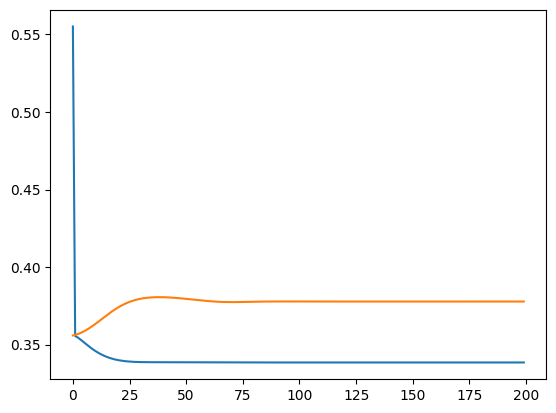

In [223]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

# Y categorica

In [224]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.5 MB/s eta 0:00:00


In [225]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

In [226]:
X_DATA.shape

(1350, 149, 31)

In [227]:
Y_DATA_CATEGORICAL_SIMPLE.shape

(1350, 31, 2)

In [228]:
inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
m = GRU(units=1)(m)

#m = Dense(units=2)(m)

m = Dropout(0.3)(m)
m = Flatten()(m)

m = Dense(Y_DATA_CATEGORICAL_SIMPLE.shape[1] * Y_DATA_CATEGORICAL_SIMPLE.shape[2] , activation='sigmoid')(m)
m = Reshape((Y_DATA_CATEGORICAL_SIMPLE.shape[1], Y_DATA_CATEGORICAL_SIMPLE.shape[2]))(m)

outputs = keras.layers.Activation(softmax_by_asset)(m)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    metrics=[],
  )

model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 149, 31)]         0         
                                                                 
 gru_5 (GRU)                 (None, 1)                 102       
                                                                 
 dropout_6 (Dropout)         (None, 1)                 0         
                                                                 
 flatten_11 (Flatten)        (None, 1)                 0         
                                                                 
 dense_19 (Dense)            (None, 62)                124       
                                                                 
 reshape (Reshape)           (None, 31, 2)             0         
                                                                 
 activation (Activation)     (None, 31, 2)             0   

In [229]:
h = model.fit(X_DATA,Y_DATA_CATEGORICAL_SIMPLE,epochs=200, batch_size=X_DATA.shape[0], validation_split = 0.3, shuffle=True)

Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.6932 - val_loss: 0.6847
Epoch 2/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6846 - val_loss: 0.6758
Epoch 3/200
1/1 [==============================] - 0s 59ms/step - loss: 0.6757 - val_loss: 0.6667
Epoch 4/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6666 - val_loss: 0.6576
Epoch 5/200
1/1 [==============================] - 0s 54ms/step - loss: 0.6572 - val_loss: 0.6493
Epoch 6/200
1/1 [==============================] - 0s 59ms/step - loss: 0.6482 - val_loss: 0.6424
Epoch 7/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6409 - val_loss: 0.6376
Epoch 8/200
1/1 [==============================] - 0s 64ms/step - loss: 0.6351 - val_loss: 0.6348
Epoch 9/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6299 - val_loss: 0.6338
Epoch 10/200
1/1 [==============================] - 0s 50ms/step - loss: 0.6272 - val_loss: 0.6338
Epoch 11/200
1/1 [===

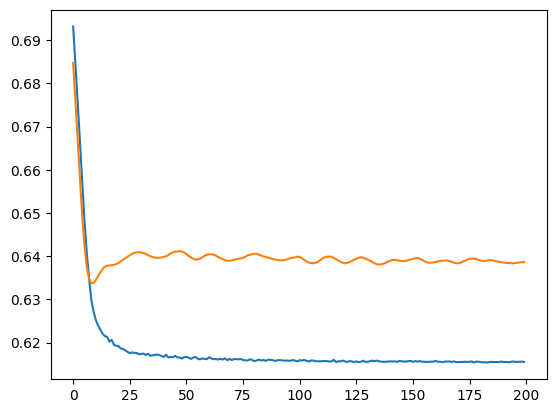

In [230]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

In [231]:
np.argmax(Y_DATA_CATEGORICAL_SIMPLE[0:1], axis = -1)

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 1, 0]])

In [232]:
Y_DATA[0:1]

array([[17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,
         7, 21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27]])

In [233]:
pred = model(X_DATA[0:1])

In [234]:
pred

<tf.Tensor: shape=(1, 31, 2), dtype=float32, numpy=
array([[[0.72382414, 0.27617586],
        [0.5665331 , 0.43346694],
        [0.72912693, 0.27087307],
        [0.72960836, 0.27039164],
        [0.7279054 , 0.27209464],
        [0.64181304, 0.35818693],
        [0.6047598 , 0.39524022],
        [0.6385117 , 0.36148828],
        [0.6955624 , 0.30443755],
        [0.73047787, 0.26952207],
        [0.7297096 , 0.2702904 ],
        [0.72968173, 0.2703183 ],
        [0.70609635, 0.29390362],
        [0.73036736, 0.2696327 ],
        [0.6955055 , 0.3044945 ],
        [0.6762019 , 0.32379812],
        [0.7298007 , 0.27019927],
        [0.65853894, 0.34146106],
        [0.60860735, 0.39139268],
        [0.5624491 , 0.43755087],
        [0.7285514 , 0.27144864],
        [0.6106647 , 0.38933527],
        [0.7263228 , 0.27367717],
        [0.6395901 , 0.3604099 ],
        [0.68244463, 0.31755534],
        [0.5433806 , 0.45661935],
        [0.73006   , 0.26994005],
        [0.5168157 , 0.4831842

In [235]:
np.argmax(pred, axis = -1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [236]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [237]:
import keras
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

In [238]:
def build_model_1(hp):

  n_units = hp.Int('n_units', min_value = 10, max_value = 100, step = 10)
  n_denses = hp.Choice('n_denses', values = [0,1,2,3 ])
  n_dropput = hp.Choice('n_dropput', values = [0.0, 0.2, 0.3,0.4, 0.5])
  n_l1 = hp.Choice('n_l1', values = [0.001, 0.0001,0.00001, 0.000001])
  n_l2 = hp.Choice('n_l2', values = [0.001, 0.0001,0.00001, 0.000001])
  last_layer_activation = hp.Choice('last_layer_activation', values = ['linear', 'relu', 'sigmoid','tanh'])
  n_learning_rate = hp.Choice('n_learning_rate', values = [0.01, 0.001,0.0001,])

  inputs = keras.Input(shape=(X_DATA.shape[1:]))
  m = inputs

  m = GRU(units=n_units,
                  kernel_regularizer=regularizers.l1_l2(l1=n_l1 , l2=n_l2 ))(m)

  m = keras.layers.Dropout(n_dropput)(m)

  for i in range(n_denses):
    m = Dense(units=n_units,
                    kernel_regularizer=regularizers.l1_l2(l1=n_l1 , l2=n_l2 ))(m)


  m = Flatten()(m)

  m = Dense(Y_DATA_CATEGORICAL.shape[1] * Y_DATA_CATEGORICAL.shape[1] , activation=last_layer_activation)(m)
  m = Reshape((Y_DATA_CATEGORICAL.shape[1], Y_DATA_CATEGORICAL.shape[1]))(m)

  outputs = keras.layers.Activation(softmax_by_asset)(m)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      loss='categorical_crossentropy',
      optimizer=keras.optimizers.Adam(learning_rate=n_learning_rate),
      metrics=['acc'],
    )

  return model



In [239]:
tuner = kt.RandomSearch(build_model_1,
                        objective='val_acc',
                        max_trials=50,
                        executions_per_trial=3,)

In [240]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
n_units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
n_denses (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1, 2, 3], 'ordered': True}
n_dropput (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
n_l1 (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}
n_l2 (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}
last_layer_activation (Choice)
{'default': 'linear', 'conditions': [], 'values': ['linear', 'relu', 'sigmoid', 'tanh'], 'ordered': False}
n_learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [241]:
tuner.search(X_DATA, Y_DATA_CATEGORICAL,
             epochs=50,
             validation_split = 0.3)

Trial 8 Complete [00h 01m 02s]
val_acc: 0.03654854496320089

Best val_acc So Far: 0.03784628336628278
Total elapsed time: 00h 08m 58s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
50                |60                |n_units
1                 |1                 |n_denses
0.2               |0.5               |n_dropput
0.0001            |1e-06             |n_l1
1e-06             |0.0001            |n_l2
linear            |relu              |last_layer_activation
0.001             |0.0001            |n_learning_rate

Epoch 1/50
30/30 [==============================] - 3s 33ms/step - loss: 3.4956 - acc: 0.0431 - val_loss: 3.4877 - val_acc: 0.0302
Epoch 2/50
30/30 [==============================] - 0s 12ms/step - loss: 3.4520 - acc: 0.0545 - val_loss: 3.5043 - val_acc: 0.0346
Epoch 3/50
30/30 [==============================] - 0s 10ms/step - loss: 3.4186 - acc: 0.0572 - val_loss: 3.4943 - val_acc: 0.0319
Epoch 4/50
30/30 [==============================] -

KeyboardInterrupt: ignored